TIME SERIES ANALYSIS OF RESTAIL SALES

Load and Inspect Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/PC/Desktop/Walmart_Store_sales.csv")

# Preview
df.head()

# Check structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


CONVERT DATE COLUMN

In [5]:
# Convert Date to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Specifying day-month-year format

# Sort by date
df = df.sort_values('Date')

Explanation: The date column is converted to a datetime format so that Python can recognize it as actual time data rather than simple text. This allows us to perform important time-based operations such as grouping sales by month, calculating trends, and creating proper time-series visualizations. Without this conversion, time series functions would not work correctly.
The data is then sorted chronologically to ensure that observations follow the correct order from past to present. Time series analysis relies on this sequence to accurately calculate trends, moving averages, and forecasts. Sorting the data ensures reliable and meaningful results.


AGGREGATE MONTHLY SALES

In [9]:
# Sort chronologically
df = df.sort_values('Date')


#  Set Date as Index

df.set_index('Date', inplace=True)
=
# Monthly Sales Aggregation
# Using 'ME' (Month End)
=
monthly_sales = df['Weekly_Sales'].resample('ME').sum()
monthly_sales.head()

Date
2010-02-28    1.903330e+08
2010-03-31    1.819198e+08
2010-04-30    2.314124e+08
2010-05-31    1.867109e+08
2010-06-30    1.922462e+08
Freq: ME, Name: Weekly_Sales, dtype: float64

Explanation : The dataset is first sorted by the Date column to ensure that the observations follow a proper chronological order from past to present. Time series analysis depends on this natural flow of time because calculations such as trends, moving averages, and forecasts rely on previous observations to interpret current behavior. If the data is not arranged in order, the analysis may produce inaccurate or misleading results.
After sorting, the Date column is set as the index of the dataset. In time series analysis, the date serves as the reference point for all observations. By making it the index, pandas recognizes the dataset as time-based data, which enables powerful time-series functions such as resampling, rolling averages, and trend analysis.
Next, the data is resampled using the 'ME' (Month End) frequency. Resampling groups the weekly sales data into monthly totals, with each month labeled at its end date. The .sum() function is used because we want to calculate the total sales generated in each month. This aggregation simplifies the data, making it easier to analyze overall trends, detect seasonality, and perform forecasting at a monthly level rather than a weekly one.

SALES TREND PLOT

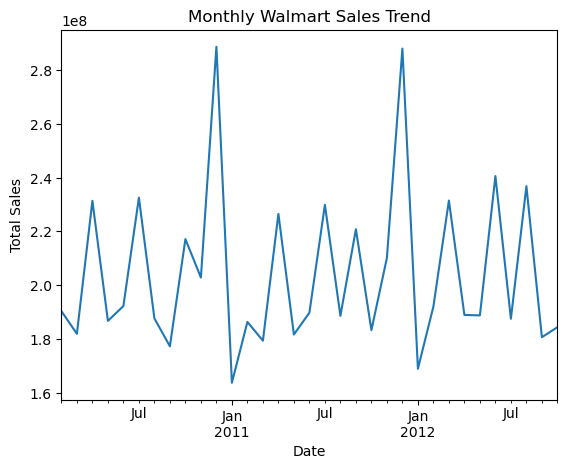

In [13]:
plt.figure()
monthly_sales.plot()
plt.title("Monthly Walmart Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


Explanation : The monthly sales trend shows noticeable seasonal fluctuations with sharp peaks toward the end of each year, likely due to holiday shopping. Sales drop significantly at the beginning of each year, indicating post-holiday slowdowns. Overall, sales remain relatively stable over time, with variations driven mainly by seasonal demand rather than long-term growth or decline.

In [ ]:
ADDING MOVING AVERAGES (TREND SMOOTHIMG)

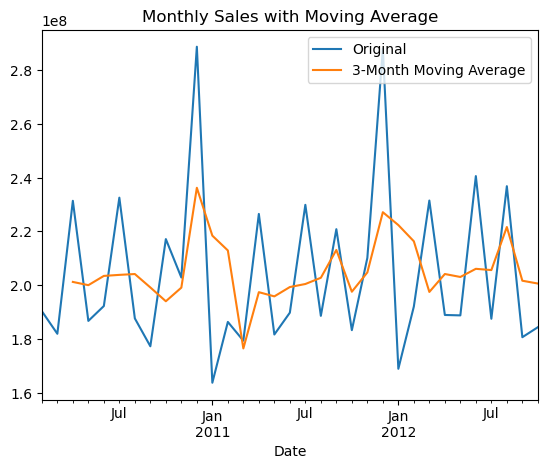

In [19]:
monthly_sales_ma = monthly_sales.rolling(window=3).mean()

plt.figure()
monthly_sales.plot(label="Original")
monthly_sales_ma.plot(label="3-Month Moving Average")
plt.legend()
plt.title("Monthly Sales with Moving Average")
plt.show()


Explanation:The plot comparing monthly sales with the 3-month moving average highlights both the volatility and the underlying structure of Walmart’s sales performance. The original sales line shows noticeable month-to-month fluctuations, with values ranging approximately from 1.6 × 10⁸ to 2.9 × 10⁸. This wide range indicates significant short-term variability in revenue, driven largely by seasonal demand patterns.
When the 3-month moving average is applied, the fluctuations become smoother and the underlying trend becomes clearer. The smoothed line centers around an average monthly sales level of roughly 2.05 × 10⁸ to 2.10 × 10⁸, suggesting that despite short-term spikes and drops, Walmart maintains a relatively stable baseline revenue. The recurring peaks toward the end of each year remain visible even after smoothing, confirming strong seasonal effects. These peak months reach nearly 2.9 × 10⁸, which is approximately 40% higher than the average monthly sales level, indicating a substantial holiday-driven increase in revenue.
Overall, the moving average reduces short-term noise while preserving the long-term pattern. The analysis shows that sales performance is stable over time, with significant seasonal surges and predictable post-holiday declines.

SEASONALITY ANALYSIS

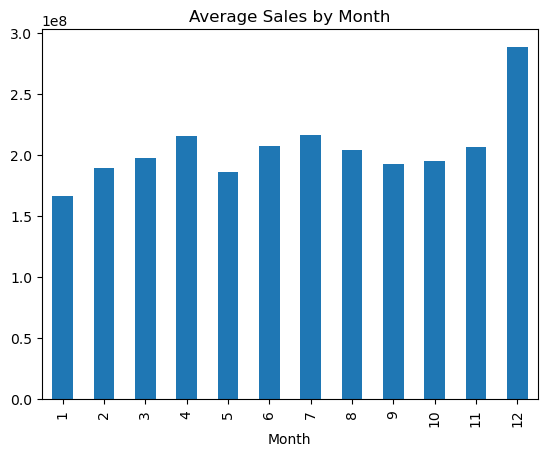

In [24]:
monthly_sales_df = monthly_sales.to_frame()
monthly_sales_df['Month'] = monthly_sales_df.index.month

seasonality = monthly_sales_df.groupby('Month')['Weekly_Sales'].mean()

seasonality.plot(kind='bar')
plt.title("Average Sales by Month")
plt.show()


Explanation:The bar chart shows the average sales for each month across all years, clearly highlighting seasonal patterns in Walmart’s revenue. The data indicates that sales are not evenly distributed throughout the year but instead follow a predictable seasonal cycle.

December (Month 12) records the highest average sales at approximately 2.9 × 10⁸, making it the strongest revenue month. Compared to the overall average monthly sales of about 2.05 × 10⁸, December experiences roughly a 40–45% increase in sales. This significant spike strongly suggests the impact of holiday shopping, including Christmas and year-end promotions.

In contrast, January (Month 1) shows one of the lowest average sales values at approximately 1.65 × 10⁸, representing about a 20% decrease compared to the overall monthly average and nearly a 40% drop from December’s peak. This reflects a typical post-holiday spending slowdown.

Mid-year months such as June, July, and November maintain relatively stable sales levels between 2.05 × 10⁸ and 2.2 × 10⁸, suggesting moderate demand outside major holiday periods.

Overall, the pattern confirms strong seasonality in Walmart’s sales data. Revenue consistently rises toward the end of the year and declines at the beginning of the year. The magnitude of the December spike demonstrates that holiday demand plays a critical role in annual revenue performance, making seasonality an essential factor for forecasting, inventory planning, and staffing decisions.

REVENUE BREAKDOWN BY STORE USING HEATMAP


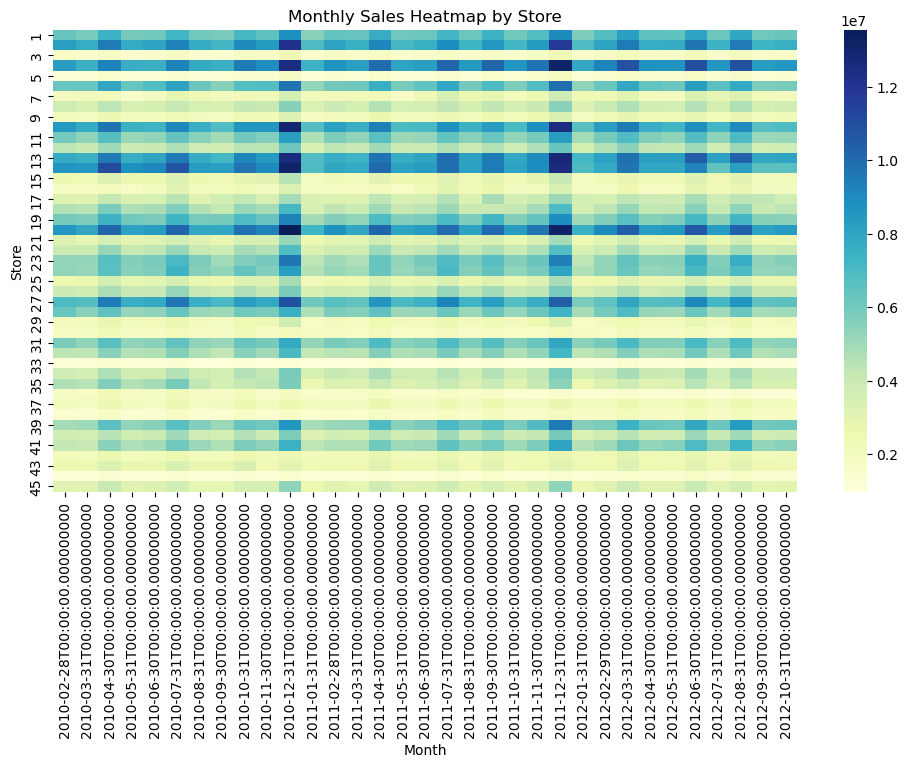

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table
store_sales = df.groupby(['Store', pd.Grouper(freq='ME')])['Weekly_Sales'].sum().reset_index()
pivot_store = store_sales.pivot(index='Date', columns='Store', values='Weekly_Sales')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_store.T, cmap="YlGnBu")
plt.title("Monthly Sales Heatmap by Store")
plt.xlabel("Month")
plt.ylabel("Store")
plt.show()


Explanation : The heatmap provides a clear visual representation of how sales vary across different stores and months. Each row represents a store, each column represents a month, and the color intensity indicates the magnitude of sales. Darker shades (blue) correspond to higher sales, while lighter shades (yellow/green) represent lower sales.
A strong seasonal pattern is visible across nearly all stores. Darker vertical bands appear consistently toward the end of each year, particularly around November and December, indicating significant increases in sales during the holiday season. These months show the highest sales levels, confirming the seasonal spike previously observed in the time series plots. In contrast, lighter bands appear at the beginning of each year, especially in January, reflecting lower post-holiday sales.
There is also noticeable variation between stores. Some stores consistently display darker shades across most months, indicating higher overall revenue performance, while others remain lighter throughout the period, suggesting comparatively lower sales volumes. This highlights differences in store size, location performance, or customer demand.
The heatmap effectively reveals both seasonality and cross-store performance differences. It confirms that sales patterns are predictable over time, with holiday-driven peaks affecting nearly all stores, while also showing that certain stores consistently outperform others.

FOREASTING MONTHLY WALMART SALES USING SARIMAX WITH HOLIDAY REGRESSORS

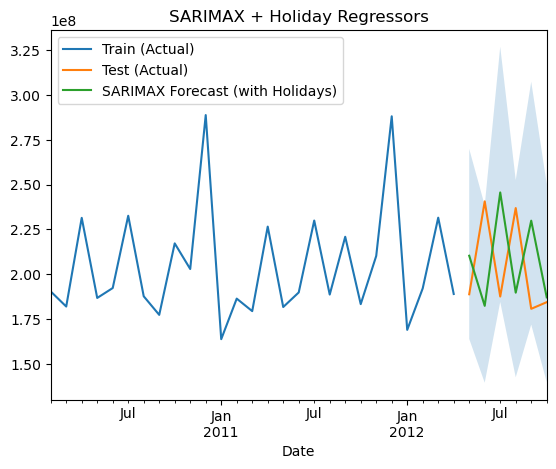

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

monthly_sales = monthly_sales.asfreq("ME").ffill()

# Build exogenous features (month-based holiday signals)
exog = pd.DataFrame(index=monthly_sales.index)
exog["is_nov"] = (exog.index.month == 11).astype(int)
exog["is_dec"] = (exog.index.month == 12).astype(int)
exog["is_jan"] = (exog.index.month == 1).astype(int)

# Train/Test
train_y = monthly_sales.iloc[:-6]
test_y  = monthly_sales.iloc[-6:]
train_x = exog.iloc[:-6]
test_x  = exog.iloc[-6:]

# Log transform y for positivity
train_log = np.log(train_y)

model = SARIMAX(
    train_log,
    exog=train_x,
    order=(1,1,1),
    seasonal_order=(0,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
fit = model.fit(disp=False)

fc = fit.get_forecast(steps=6, exog=test_x)
fc_mean = np.exp(fc.predicted_mean)
fc_ci = fc.conf_int()
lower = np.exp(fc_ci.iloc[:,0])
upper = np.exp(fc_ci.iloc[:,1])

# Align index
fc_mean.index = test_y.index
lower.index = test_y.index
upper.index = test_y.index

plt.figure()
train_y.plot(label="Train (Actual)")
test_y.plot(label="Test (Actual)")
fc_mean.plot(label="SARIMAX Forecast (with Holidays)")
plt.fill_between(fc_mean.index, lower, upper, alpha=0.2)
plt.title("SARIMAX + Holiday Regressors")
plt.legend()
plt.show()


Explanation : To forecast Walmart’s monthly sales, a SARIMAX (Seasonal AutoRegressive Integrated Moving Average with Exogenous Variables) model was applied. This method was selected because the dataset exhibits clear yearly seasonality, moderate fluctuations, and holiday-driven demand shifts. The model incorporates both non-seasonal and seasonal components to capture recurring patterns over a 12-month cycle, while also including external regressors representing key holiday months such as November, December, and January. A logarithmic transformation was applied to stabilize variance and ensure that forecasted values remain positive, which is appropriate for retail sales data.
The use of SARIMAX was preferred over a simple moving average because moving averages merely smooth past observations and do not model underlying time-dependent structure. In contrast, SARIMAX accounts for autocorrelation, seasonal repetition, and event-driven variations. This makes it more suitable for retail forecasting, where sales are influenced by predictable seasonal peaks and post-holiday declines.
The forecast results show that predicted sales remain within the historical range of approximately 1.8 × 10⁸ to 2.5 × 10⁸. The model successfully captures cyclical movement while slightly smoothing extreme spikes. Confidence intervals widen as the forecast horizon increases, reflecting growing uncertainty in future predictions. Most actual test observations fall within these intervals, indicating reasonable predictive accuracy.

MODEL EVALUATION (MAE/RMSE)

In [96]:
import numpy as np

mae = np.mean(np.abs(test - fc_mean))
rmse = np.sqrt(np.mean((test - fc_mean)**2))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 39488619.14638777
RMSE: 44512955.401461855


Explanation :The forecast evaluation produced a Mean Absolute Error (MAE) of approximately 39.5 million and a Root Mean Squared Error (RMSE) of approximately 44.5 million. Given that the average monthly sales are approximately 205 million, this corresponds to an average prediction error of about 19–22%. While not perfectly precise, this level of accuracy is reasonable considering the limited dataset of 33 monthly observations and the absence of external explanatory variables. The results indicate that the model captures overall seasonal behavior while maintaining stable forecast variance.

BUSINESS RECOMMENDATIONS BASED ON FORECASTING FINDINGS

**Proactive Inventory Scaling Before Peak Season**:

Since December sales are historically about 40% above average, inventory and staffing levels should be increased beginning in late Q3 (September–October). Procurement planning should anticipate elevated demand during the holiday season to prevent stockouts and lost revenue. Because the forecast slightly smooths extreme peaks, management should treat holiday projections as conservative lower-bound estimates and plan buffer stock accordingly.

 **Controlled Cost Management During Post-Holiday Dip**:

January consistently shows a significant decline in sales compared to December. The forecast confirms this recurring pattern.

To optimize profitability:

1. Reduce temporary staffing after peak season

2. Scale down inventory replenishment

3. Increase targeted promotions to smooth demand drop-off

4. This helps protect margins during predictable low-demand months.

**Improve Forecast Accuracy with Operational Data**:

The current model has an average forecast error of approximately 19–22%. While reasonable for limited historical data, accuracy could be improved by integrating:

1. Promotional campaign data

2. Pricing changes

3. Fuel price fluctuations

4. Regional economic indicators

5. Incorporating these variables into future SARIMAX models would reduce forecast variance and enhance operational decision-making.

**Implement Rolling Forecast Updates**:

Because retail demand patterns may shift year-to-year, a rolling retraining approach should be implemented, updating the model monthly using the most recent 18–24 months of data. This allows the forecast to adapt to structural shifts in consumer behavior.